# Data_COllection

In [1]:
import selenium
import pandas as pd
from selenium import webdriver
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--incognito")

In [3]:
url1='https://www.flipkart.com/'

In [4]:
search=['laptops', 'Phones', 'Headphones', 'smart watches', 'Professional Cameras', 'Printers', 'monitors', 
        'Home theater', 'router']

In [5]:
from selenium.common.exceptions import NoSuchElementException

In [6]:
rating=[]
review=[]

In [7]:
for item in search:
    driver_1 = webdriver.Chrome(executable_path = 'C:/Users/AnnA/Desktop/webdriver/chromedriver.exe')
    driver_1.get(url1)

    #Closing Pop-up
    close_button=driver_1.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']")
    close_button.click()

    # searching required fields
    search=driver_1.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
    search.send_keys(item)

    search_button=driver_1.find_element_by_xpath("//button[@class='L0Z3Pu']")
    search_button.click()
    time.sleep(5)

    # Storing href links of each listing on first page
    links=driver_1.find_elements_by_xpath("//a[@class='_1fQZEK']")
    for i in links:
        driver_2= webdriver.Chrome(executable_path = 'C:/Users/AnnA/Desktop/webdriver/chromedriver.exe')
        url=i.get_attribute('href')
        driver_2.get(url)
        # Opening full reviews
        try:
            full=driver_2.find_element_by_xpath("//div[@class='col JOpGWq']/a")
        except:
            continue
        driver_3= webdriver.Chrome(executable_path = 'C:/Users/AnnA/Desktop/webdriver/chromedriver.exe')
        url=full.get_attribute('href')
        driver_3.get(url) 
        driver_2.close()


        a=driver_3.find_elements_by_xpath("//div[@class='col']/div/div[1]/div")
        for j in a[2:]:
            rating.append(j.text)

        a=driver_3.find_elements_by_xpath("//div[@class='t-ZTKy']/div/div")
        for k in a:
            review.append(k.text)

        driver_3.close()

    driver_1.close()
            


In [8]:
df=pd.DataFrame({})
df['rating']=rating
df['review']=review

In [9]:
df.shape

(188, 2)

In [10]:
len(rating)

188

In [11]:
len(review)

188

In [14]:
df.head()

rating                                             review
0      5  Definitely one of the best 24 inch monitor. ha...
1      4  The monitor was affordable and got it at disco...
2      4  This is the good one which I have choose from ...
3      5                            Best price Best quality
4      5  Except Sound Issues test everything is Good an...

In [15]:
df.to_csv('Ratings_Data')

# Part 2 - Modelling

# Pre-processing

In [16]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [18]:
#Reading the Dataset:
df = pd.read_csv('Ratings_Data')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
df.head()

rating                                             review
0       5  Definitely one of the best 24 inch monitor. ha...
1       4  The monitor was affordable and got it at disco...
2       4  This is the good one which I have choose from ...
3       5                            Best price Best quality
4       5  Except Sound Issues test everything is Good an...

<AxesSubplot:xlabel='rating', ylabel='count'>

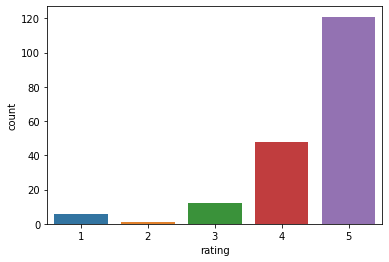

In [20]:
# Let's see how our Target column is distributed:
import seaborn as sns
sns.countplot('rating',data=df)

In [21]:
#Lowering the cases.
df['review'] = df.review.str.lower()

In [22]:
cols=['review']
for j in cols:
    # Replace email addresses with 'email'
    df[j] = df[j].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    df[j] = df[j].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    df[j] = df[j].str.replace(r'£|\$', 'dollers')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[j] = df[j].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


    # Replace numbers with 'numbr'
    df[j] = df[j].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    df[j] = df[j].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    df[j] = df[j].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    df[j] = df[j].str.replace(r'^\s+|\s+?$', '')

In [23]:
#Checking the head.
df.head()

rating                                             review
0       5  definitely one of the best numbr inch monitor ...
1       4  the monitor was affordable and got it at disco...
2       4  this is the good one which i have choose from ...
3       5                            best price best quality
4       5  except sound issues test everything is good an...

In [24]:
#Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['review'] = df['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [25]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['review'] = df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

rating                                             review
0       5  [definitely, one, best, numbr, inch, monitor, ...
1       4  [monitor, affordable, got, discounted, price, ...
2       4  [good, one, choose, many, market, numbr, color...
3       5                       [best, price, best, quality]
4       5  [except, sound, issues, test, everything, good...

In [26]:
# writing function for the entire dataset
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [27]:
# Processing review with above Function
processed_review = []

for doc in df.review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

188


[['definit',
  'one',
  'best',
  'numbr',
  'inch',
  'monitor',
  'numbr',
  'hdmi',
  'input',
  'numbr',
  'audio',
  'output',
  'port',
  'buy',
  'home',
  'studio',
  'audio',
  'output',
  'port',
  'connect',
  'studio',
  'monitor',
  'sound',
  'pretti',
  'natur',
  'pictur',
  'qualiti',
  'realli',
  'awesom',
  'multipl',
  'option',
  'tweak',
  'display',
  'bezel',
  'also',
  'pretti',
  'thin',
  'look',
  'amaz',
  'desk',
  'thank',
  'seller',
  'flipkart',
  'get',
  'inr',
  'numbr'],
 ['monitor',
  'afford',
  'get',
  'discount',
  'price',
  'numbr',
  'discount',
  'credit',
  'card',
  'good',
  'numbr',
  'inch',
  'monitor',
  'use',
  'work',
  'well',
  'watch',
  'video',
  'youtub',
  'ott',
  'platform',
  'hdmi',
  'output',
  'user',
  'vga',
  'dvi',
  'use',
  'adapt',
  'consid',
  'tje',
  'laptop',
  'desktop',
  'mother',
  'board',
  'come',
  'hdmi',
  'port',
  'issu'],
 ['good',
  'one',
  'choos',
  'mani',
  'market',
  'numbr',
  'co

In [28]:
df['clean_review']=processed_review

In [29]:
df.head()

rating                                             review  \
0       5  [definitely, one, best, numbr, inch, monitor, ...   
1       4  [monitor, affordable, got, discounted, price, ...   
2       4  [good, one, choose, many, market, numbr, color...   
3       5                       [best, price, best, quality]   
4       5  [except, sound, issues, test, everything, good...   

                                        clean_review  
0  [definit, one, best, numbr, inch, monitor, num...  
1  [monitor, afford, get, discount, price, numbr,...  
2  [good, one, choos, mani, market, numbr, color,...  
3                       [best, price, best, qualiti]  
4  [except, sound, issu, test, everyth, good, bes...

In [30]:
df['review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))

In [31]:
df.head()

rating                                             review  \
0       5  definit one best numbr inch monitor numbr hdmi...   
1       4  monitor afford get discount price numbr discou...   
2       4  good one choos mani market numbr color qualiti...   
3       5                            best price best qualiti   
4       5    except sound issu test everyth good best option   

                                        clean_review  
0  [definit, one, best, numbr, inch, monitor, num...  
1  [monitor, afford, get, discount, price, numbr,...  
2  [good, one, choos, mani, market, numbr, color,...  
3                       [best, price, best, qualiti]  
4  [except, sound, issu, test, everyth, good, bes...

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

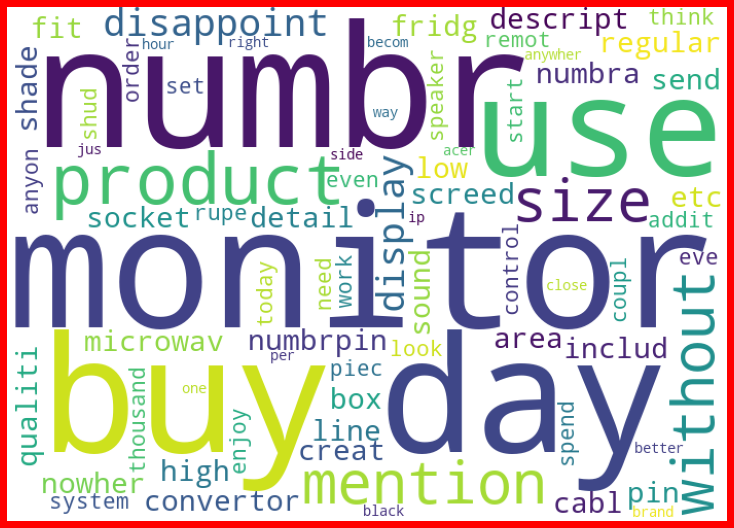

In [33]:
#Getting sense of words in Rating 1
one = df['review'][df['rating']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

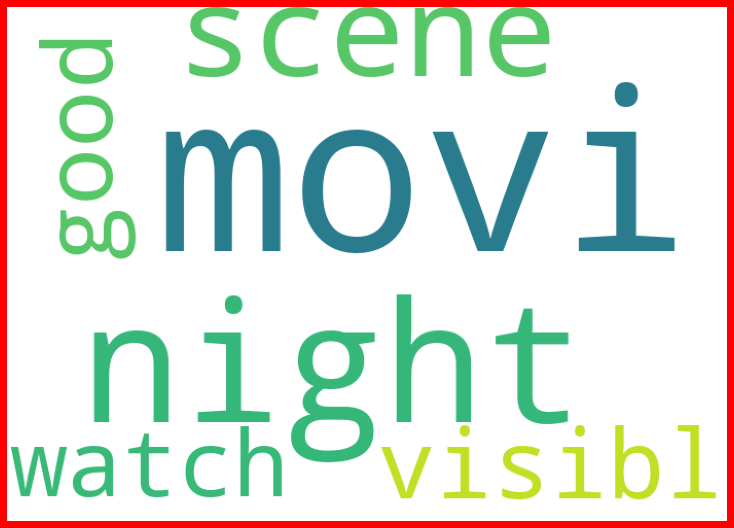

In [34]:
#Getting sense of words in Rating 2
one = df['review'][df['rating']==2]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

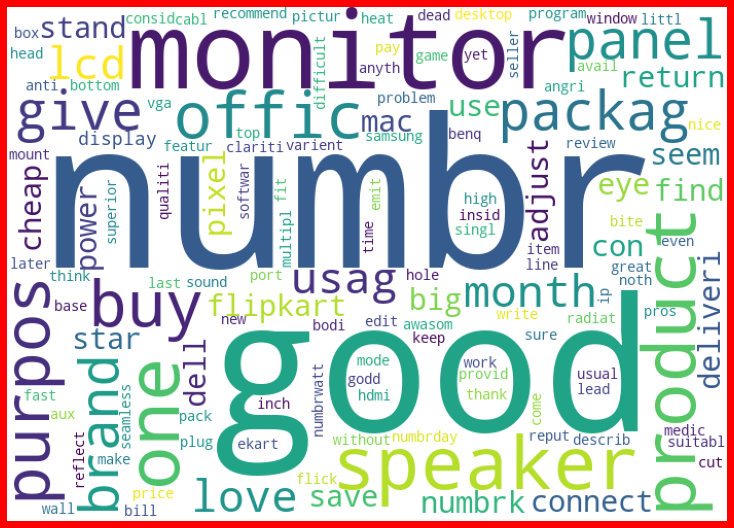

In [35]:
#Getting sense of words in Rating 3
one = df['review'][df['rating']==3]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

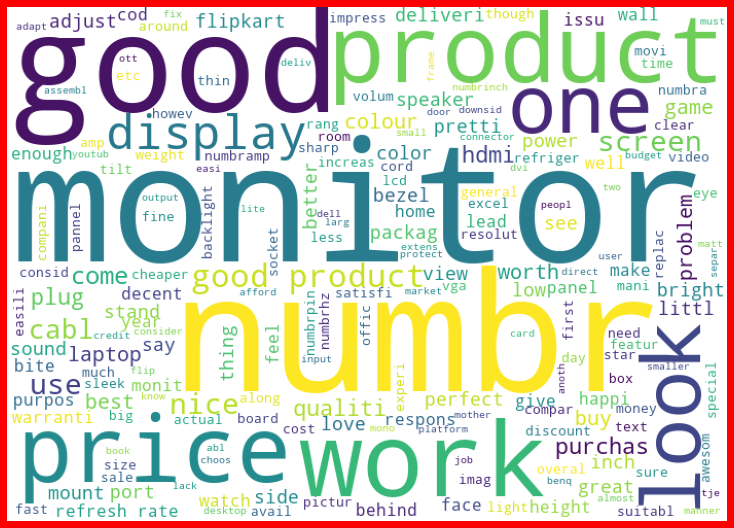

In [36]:
#Getting sense of words in Rating 4
one = df['review'][df['rating']==4]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

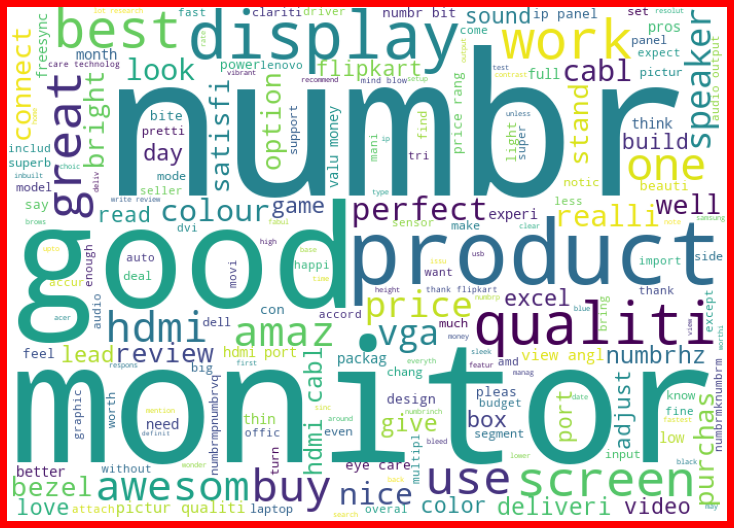

In [37]:
#Getting sense of words in Rating 5
one = df['review'][df['rating']==5]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [38]:
# 1. Convert text into vectors using TF-IDF
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['review'])

X = features
y = df['rating']
X.shape

(188, 863)

In [39]:
y.shape

(188,)

# Model Building

In [41]:
!pip install xgboost

In [42]:
# Libraries for training

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Mmetrics to evaluate our model performance 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating instances

RF=RandomForestClassifier()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()
AD=AdaBoostClassifier()
XG=XGBClassifier()

In [52]:
# List of Models
models=[]
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('XGBClassifier',XG))

In [92]:
# Finding best Random State and then calculate Maximum Accuracy Score
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=r_state)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [93]:
Model=[]
Score=[]
Acc_score=[]


for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
   

    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=43)
    model.fit(x_train,y_train)
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)

    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')

*************************** MultinomialNB() *****************************


MultinomialNB()


Learning Score :  0.6564885496183206
Accuracy Score :  0.6491228070175439
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        16
           5       0.65      1.00      0.79        37

    accuracy                           0.65        57
   macro avg       0.22      0.33      0.26        57
weighted avg       0.42      0.65      0.51        57



Confusion Matrix:
 [[ 0  0  4]
 [ 0  0 16]
 [ 0  0 37]]


*************************** DecisionTreeClassifier *****************************


DecisionTreeClassifier()


Learning Score :  0.9847328244274809
Accuracy Score :  0.5789473684210527
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00       

In [94]:
scores=pd.DataFrame({'Model': Model,'Learning Score': Score})
scores.style.background_gradient()

<AxesSubplot:>

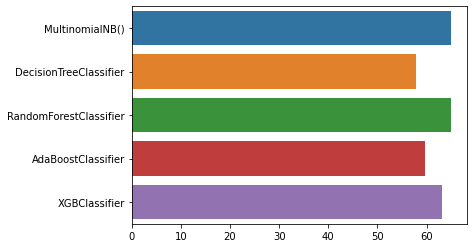

In [95]:
sns.barplot(y=Model,x=Acc_score)

# Random Forest Classifier gives best results. So here we tune the hyperparameters

In [96]:
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=10)
    clf.fit(X,y)
    print(clf.best_params_)

In [61]:
# Using Grid Search CV
rf=RandomForestClassifier()
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid_cv(rf,parameters,'accuracy')

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [97]:
RFC_hyper = RandomForestClassifier(random_state = 54, 
                                max_depth = 5,     n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1)


In [99]:
max_acc_score(RFC_hyper,X,y)

Max Accuracy Score corresponding to Random State  68 is: 0.7368421052631579




68

# Final Model

In [112]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=54,test_size=.20)
RFC_hyper = RandomForestClassifier(max_depth = 20,n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1)
RFC_hyper.fit(x_train,y_train)
RFC_hyper.score(x_train,y_train)
RFpred=RFC_hyper.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,RFpred)) 
print('Confusion Matrix:\n',confusion_matrix(y_test,RFpred))
print('Classification Report:','\n',classification_report(y_test,RFpred))

Accuracy Score: 0.6842105263157895
Confusion Matrix:
 [[ 0  0  0  2]
 [ 0  0  1  2]
 [ 0  0  0  7]
 [ 0  0  0 26]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.70      1.00      0.83        26

    accuracy                           0.68        38
   macro avg       0.18      0.25      0.21        38
weighted avg       0.48      0.68      0.56        38



In [113]:
test=pd.DataFrame(data=y_test,)
test['Predicted values']=RFpred

test.to_csv('Ratings_Predict.csv')

test

rating  Predicted values
112       5                 5
12        5                 5
174       5                 5
167       1                 5
71        3                 5
59        3                 5
78        5                 5
136       5                 5
11        5                 5
86        5                 5
33        4                 5
138       5                 5
4         5                 5
95        5                 5
143       5                 5
89        1                 5
31        4                 5
123       5                 5
132       5                 5
0         5                 5
103       5                 5
44        5                 5
117       5                 5
171       5                 5
151       5                 5
74        4                 5
164       5                 5
156       4                 5
88        4                 5
108       5                 5
90        5                 5
142       5                 5
113       4                 5
145       5                 5
7         4                 5
179       5                 5
49        5                 5
34        3                 4

In [114]:
# Creating Pickle File
import joblib
joblib.dump(clf_rf,'Ratings_Predict.pkl')

['Ratings_Predict.pkl']